<b>DataRoot block 3</b><br>Honcharov Danylo.
<br> 
<details title="List of used materials. Click to open (or close)">
<summary>Used materials:<br></summary>
<figure>
Numpy:<ul> <li> http://www.labri.fr/perso/nrougier/from-python-to-numpy/ </li>
<li>https://docs.scipy.org/doc/numpy/user/ </li>
<li> https://www.dataquest.io/blog/numpy-tutorial-python/ </li>
<li> https://github.com/rougier/numpy-tutorial </li> </ul>
</figure>
<figure>
Scipy: <ul><li> https://docs.scipy.org/doc/scipy/reference/tutorial/index.html </li></ul>
</figure>
<figure>
Pandas: <ul> <li> https://www.dataquest.io/blog/pandas-python-tutorial/</li>
<li>http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/</li>
<li>http://www.gregreda.com/2013/10/26/working-with-pandas-dataframes/</li>
<li>http://www.gregreda.com/2013/10/26/using-pandas-on-the-movielens-dataset/ </li> 
<li>http://machinelearningmastery.com/quick-and-dirty-data-analysis-with-pandas/</li></ul>
</figure> <figure>
Matplotlib: <ul> <li>http://nbviewer.jupyter.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1%20Chapter%201%20Pyplot.ipynb </li>
<li>https://pythonworld.ru/novosti-mira-python/scientific-graphics-in-python.html </li> <li>http://matplotlib.org/users/pyplot_tutorial.html </li>
<li>https://www.dataquest.io/blog/matplotlib-tutorial/ </li> </ul>
</figure>
<figure>
Classification accuracy (metrics for quality assurance): <ul> <li> http://bazhenov.me/blog/2012/07/21/classification-performance-evaluation.html </li>
<li>http://scikit-learn.org/stable/modules/model_evaluation.html</li>
<li>http://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/</li></ul>
</figure><figure>
Preprocessing data: <ul><li>http://machinelearningmastery.com/prepare-data-machine-learning-python-scikit-learn/</li> </ul>
</figure><figure>
SVM theory: <ul><li> http://www.svm-tutorial.com/svm-tutorial/ </li>
<li> http://www.machinelearning.ru/wiki/index.php?title=SVM </li>
<ul> 
</figure>
</details>

<b>Author - Honcharov Danylo, project for DataRoot courses.</b>
<p><font size=2>In this block students have to choose one of the several possible projects and do five task:
<br> <ul>
<li> 1.<a href="#task1"> Explore the data.</a> </li>
<li> 2. Choose 2 models (maybe more if you want) and metrics for quality assurance. </li>
<li> 3. Implement the models and compare them. </li>
<li> 4. Make some conclusions and ways to improve result. </li>
<li> 5. Prepare iPython notebook and presentation. </li></ul>
For some reasons I chose the project 4 from the projects list (projects list and tasks can be found at https://docs.google.com/document/d/1-Xz8Drk2NvDC4-jctFq19cCkAl0qSns8KPoYAZTSofI/edit ). <br> The project problem  - <b> Gender Recognition by Voice. </b> <pr> Dataset was used from https://www.kaggle.com/primaryobjects/voicegender.
</font><br><br>
<font size=4 id="task1"><b>1. Task 1 - explore the data.</b> </font><br> Let's do it!
<br> Okay, first we need somehow read data. We can just use pandas : 

In [13]:
import pandas as pd
data=pd.read_csv("voice.csv")
print(data.head())
print("Length of data (how many samples):",len(data))

   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...    centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...    0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...    0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...    0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...    0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...    0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812

Important question - is our data balanced?

In [12]:
m_size=len(data[data['label']=='male'])
f_size=len(data[data['label']=='female'])
if(m_size==f_size):
           print("Data absolutely balanced")
           print("Each class containts:",m_size)
else: 
           print("Data unbalanced")
           print("First class contains:",m_size," ,second:",f_size)

Data absolutely balanced
Each class containts: 1584


And let's look, maybe we have some null values:

In [17]:
print(data.isnull().any())

meanfreq    False
sd          False
median      False
Q25         False
Q75         False
IQR         False
skew        False
kurt        False
sp.ent      False
sfm         False
mode        False
centroid    False
meanfun     False
minfun      False
maxfun      False
meandom     False
mindom      False
maxdom      False
dfrange     False
modindx     False
label       False
dtype: bool


Okay, we have 20 features and two classes. Let's see correlations between features (using pandas, of course, it's powerful)

In [3]:
data.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


Oooh, we have some new information.<br> Let's go ahead with exploring data. Actually, we cave very intresting function - "describe". Let's use it.

In [4]:
data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


This is some statistical data about out statistical data <s>and we need to go deeper</s>(std - standart deviation, other row names quite selfdiscriptive). Can we build some histograms? This is a piece of cake:

<IPython.core.display.Javascript object>


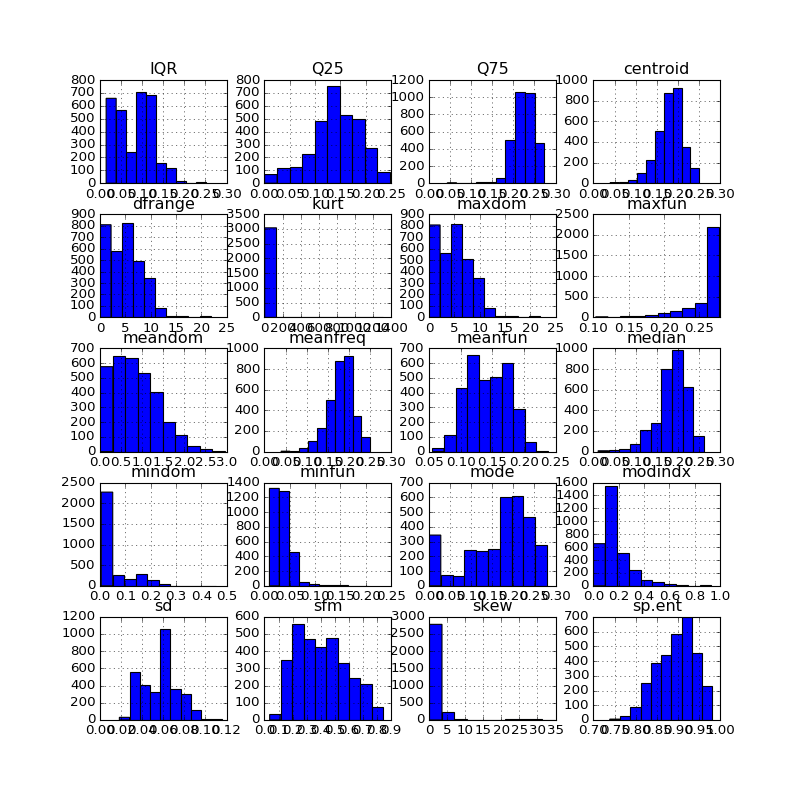

In [14]:
#%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

%matplotlib notebook

data.hist(figsize=(10,10)) #setting size of matplotlib window, cause default size is too small
print("") #clearing unnessesary information

Maybe it's good idea to look at the differences of the features aside for male and female voices. Let's look.

<IPython.core.display.Javascript object>


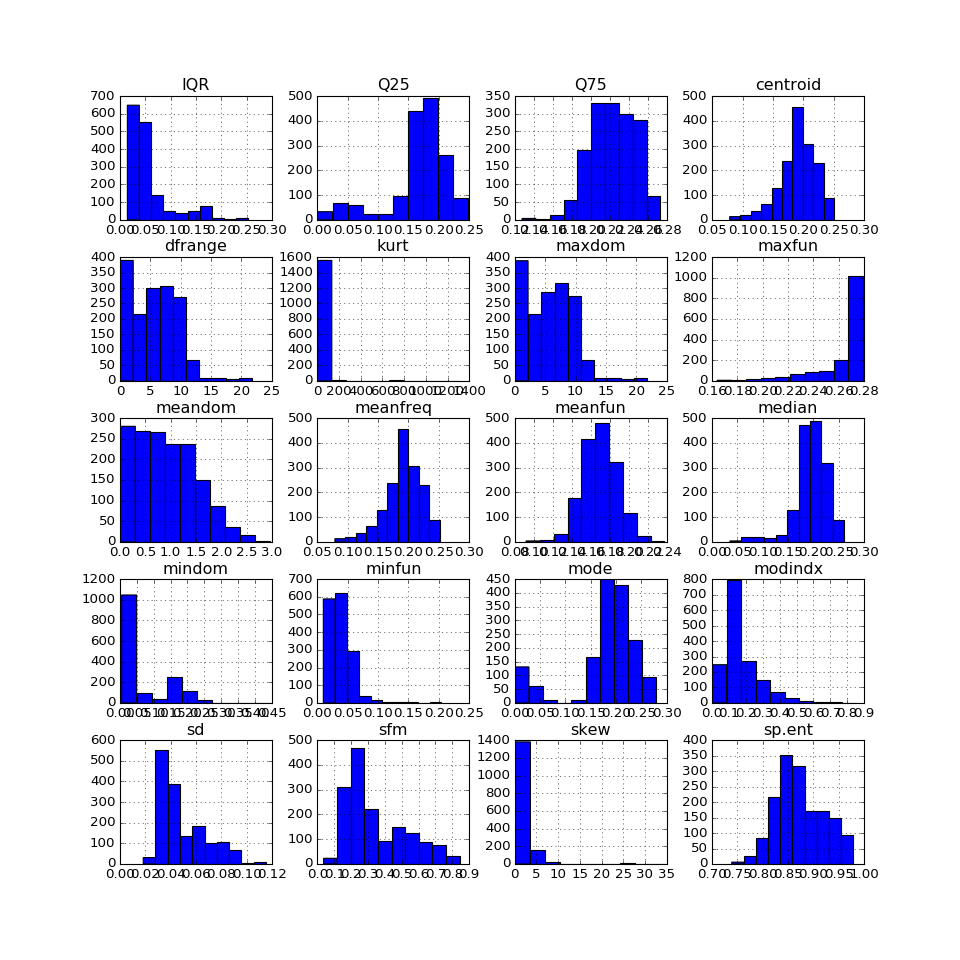

<IPython.core.display.Javascript object>


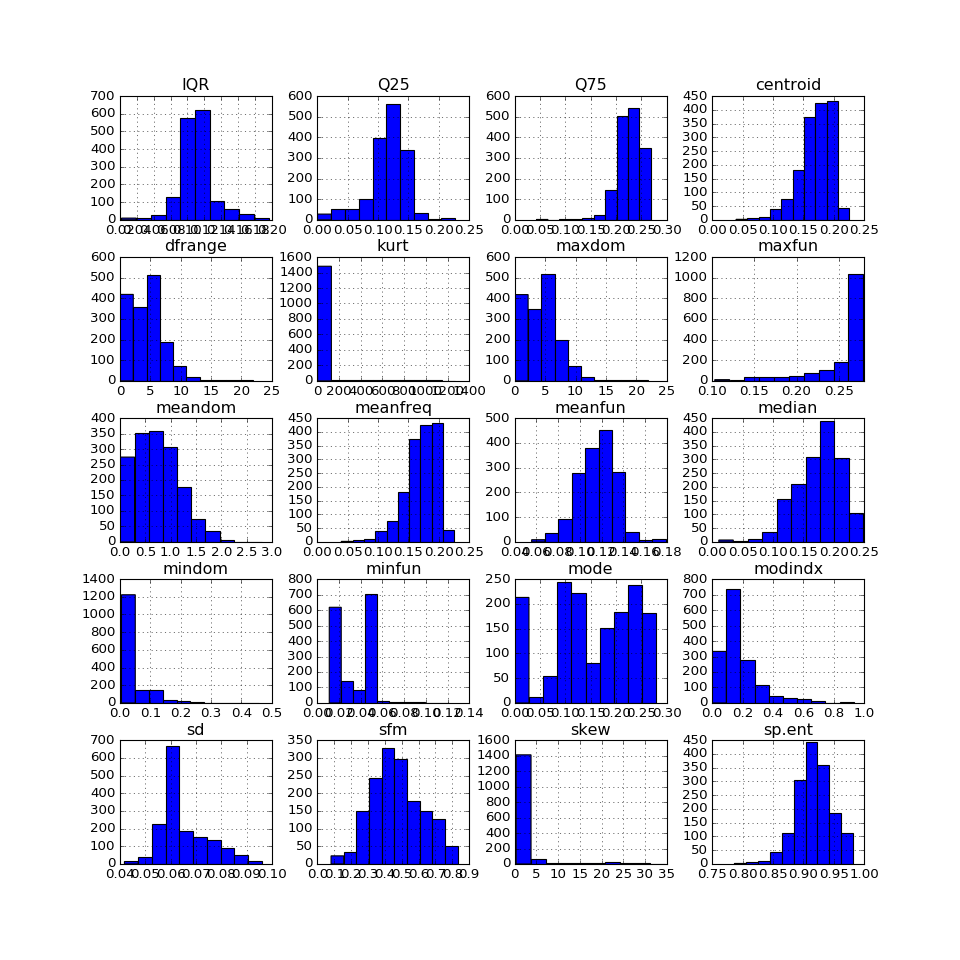

In [15]:
%matplotlib notebook
data.groupby("label").hist(figsize=(12,12)) #setting size of matplotlib window, cause default size is too small
print("") #clearing unnessesary information

So, we can assume that the features really different for this classes. For instance - we can look on differences on meanfun,meanfreq,IQR,mode features:

<IPython.core.display.Javascript object>


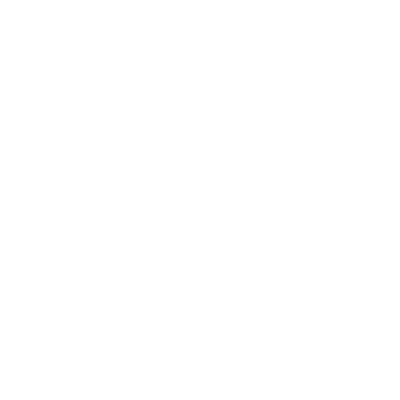

<IPython.core.display.Javascript object>


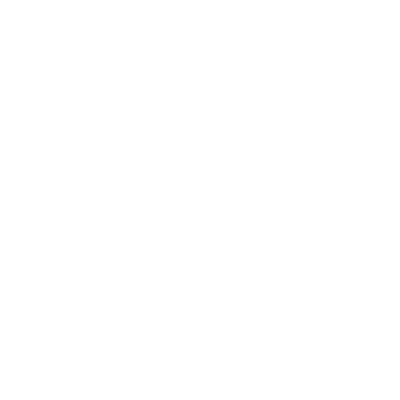

<IPython.core.display.Javascript object>


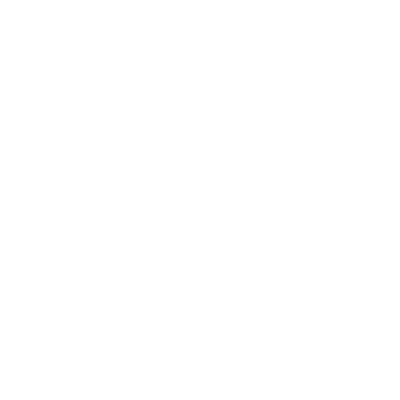

<IPython.core.display.Javascript object>


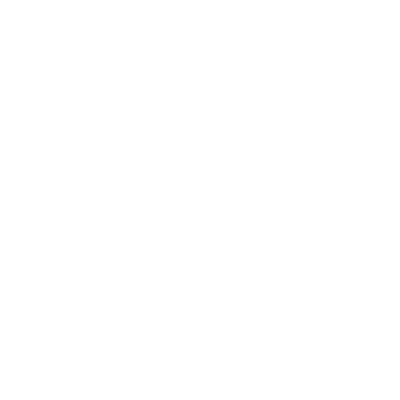

In [16]:
%matplotlib notebook
import matplotlib.pyplot as plt
data.groupby("label").meanfun.hist(figsize=(5,5),alpha=0.5)
fig, axes = plt.subplots()
data.groupby("label").meanfreq.hist(figsize=(5,5),alpha=0.5)
fig, axes = plt.subplots()
data.groupby("label").IQR.hist(figsize=(5,5),alpha=0.5)
fig, axes = plt.subplots()
data.groupby("label").mode.hist(figsize=(5,5),alpha=0.5)
print("") #clearing unnessesary information

It's look similar, we can see the normal distribution in both cases, but also we can see some shift. Final step of the exploring data - let's look to relationships between the features:

In [ ]:
%matplotlib notebook
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, alpha=0.2, figsize=(18, 15), diagonal='kde')
print("") #clearing unnessesary information

<IPython.core.display.Javascript object>

Okay, we can assume correlation between dfrange and maxdom features, between kurt and skew, between meanfreq and centroid and so on.

<font size=4><b> 2. Task 2 - choose 2 models and metrics for quality assurance.</b> </font> <br>
<font size=3> 2.0. Preparing data.</font><br> 
First, we should to prepare data. We need to split it into train and test cases.<br> How we can do it? 
We can do it in pandas way:


In [25]:
procent_of_train_data=0.9 #how many data will be in train case
data_for_splitting=data.sample(frac=1).reset_index(drop=True) #the problem is that 'label' field in data is ordered
#so we can't just split it, we need to shuffle it first
train_data=data_for_splitting[:(int(len(data)*procent_of_train_data))]
test_data=data_for_splitting[(int(len(data)*procent_of_train_data)):]
print("Length of train data:",len(train_data))
print("Length of test data:",len(test_data))

Length of train data: 2851
Length of test data: 317


Of course, it possible to use scikit-learn library, just like that:

In [3]:
from sklearn.model_selection import train_test_split
procent_of_train_data=0.9
data_x=data.iloc[:,:-1]
data_y=data['label']
train_data_x,test_data_x,train_data_y,test_data_y=train_test_split(data_x,data_y,train_size=procent_of_train_data)
print(len(train_data_x))
print(len(test_data_x))

2851
317


Next, is look like a good idea to apply "standardization" to data. ("Standardization" - is making the mean of feature 0 and making the deviation 1).<br> I tried to run classification without this, and it's worked, but after standardization the quality of classification really increased. So, let's do it!

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data_x=scaler.fit_transform(train_data_x)
test_data_x=scaler.transform(test_data_x)
print(train_data_x.mean())
print(train_data_x.std())

1.19877606419e-16
1.0


<font size=3>2.1. Choosing and implementing first model.</font><br>
Okay, data is prepared.<br><p> Next, I should choose models. I'm intresting in trying logistic regression. Why? <br>
Because I want to see how this not very complicated model can deal with this data.

In [32]:
from sklearn import linear_model
regress_skl=linear_model.LogisticRegression()
regress_skl.fit(train_data_x,train_data_y)
print(regress_skl.score(test_data_x,test_data_y))


0.97476340694


As we see, even simple logistic regression algorithm can perform really good. <br> But how about custom realization of logistic regression, using numpy and scipy.optimize? Let's look:

In [17]:
import numpy as np
from sklearn import preprocessing
from scipy.optimize import minimize

class Logistic_Regression_custom:
    def __init__(self):
        self.coefs=[]

    def f(self,x_vectors,param):
        x_vectors=np.array(x_vectors,np.float128)
        params_multipl_by_vectors=param[1:]*x_vectors
        sum_of_all=param[1]+np.sum(params_multipl_by_vectors,axis=1)
        #print(sum_of_all.max())
        sum_of_all=np.exp((-1)*sum_of_all)
        sum_of_all=1/(1+sum_of_all)
        sum_of_all[sum_of_all==1]=0.999999999999999  #very lame code,avoiding zero in log
        return sum_of_all

    def function(self,param):
        model=self.model
        log_sum=0
        for m in model.keys():
            f_value=self.f(model[m],param)
            log_sum+=(m*np.log(f_value)+(1-m)*np.log(1-f_value)).sum()
        log_sum/=-1*(len(model[0])+len(model[1]))
        return log_sum

    def train(self, X, y):
        X=np.array(X)
        y=np.array(y)
        self.model = {}
        self.le = preprocessing.LabelEncoder()
        y = list(y)
        y = self.le.fit_transform(y)
        for current in range(len(y)):
            if y[current] in self.model:
                self.model[y[current]].append(X[current])
            else:
                self.model[y[current]] = [X[current]]
        x0 = np.random.rand(X.shape[1] + 1)
        self.coefs = minimize(self.function,x0).x
        #print(self.coefs)

    def score(self,X,y):
        if(len(self.coefs)==0):
            return 0;
        X=np.array(X)
        y = list(y)
        y = self.le.transform(y)
        function_values=self.f(X,self.coefs)
        function_values[function_values>=0.5]=1
        function_values[function_values<0.5]=0
        difference=np.fabs(function_values-y)
        correct_sum=len(y)-difference.sum()
        return (correct_sum/len(y)) #return accuracy of test case

regress=Logistic_Regression_custom()
regress.train(train_data_x, train_data_y)
print(regress.score(test_data_x,test_data_y))
    

0.971608832808


Okay, but what is a number, which we get? <br> It's <b>accuracy</b>. It's just result of dividing between amount correctly recognized test cases and amount of all test cases. <br> What other metrics we can use for understanding, how good our classificator works? Okay, other possible metrics is <b>precision</b> ("точность") and <b>recall</b> ("полнота") and <b>f-measure</b>.<br> Also, we can look at confusion matrix.
We can calculate it, using next values for each class - "true positive", "true negative", "false positive" and "false negative".

In [30]:
class RegressionEvaluator:
    def __init__(self,regress_object):
        self.regress=regress_object
    def evaluate(self,X,y):
        if(len(self.regress.coefs)==0):
            return 0;
        X=np.array(X)
        y = list(y)
        y = self.regress.le.transform(y)
        function_values=self.regress.f(X,self.regress.coefs)
        function_values[function_values>=0.5]=1
        function_values[function_values<0.5]=0
        difference=np.fabs(function_values-y)
        correct_sum=len(y)-difference.sum()
        self.calculate_accuracy_measures(function_values, y)
        self.print_accuracy_data()

    def print_confusion_matrix(self):
        print("Confusion matrix:")
        print("\tMale\tFemale")
        print("Male:  ",self.male_true_positive,"\t",self.male_false_positive)
        print("Female:", self.male_false_negative, "\t", self.male_true_negative)
        print("\r\n")

    def print_f_measures(self):
        print("Male f_measure",self.f_measure_male)
        print("Female f_measure", self.f_measure_female)

    def calculate_accuracy_measures(self, function_values, y):
        signed_differ = function_values - y
        self.male_true_positive = len(function_values[(signed_differ==0) & (y == 1)])
        self.female_true_positive = len(function_values[(signed_differ==0) & (y == 0)])
        self.male_true_negative = self.female_true_positive
        self.female_true_negative = self.male_true_positive
        self.male_false_positive = len(function_values[(signed_differ == 1 ) & (y == 0)])
        self.male_false_negative = len(function_values[(signed_differ == -1) & (y == 1)])
        self.female_false_positive = self.male_false_negative
        self.female_false_negative = self.male_false_positive
        self.male_precision=self.male_true_positive/(self.male_true_positive+self.male_false_positive)
        self.male_recall=self.male_true_positive/(self.male_true_positive+self.male_false_negative)
        self.female_precision = self.female_true_positive / (self.female_true_positive + self.female_false_positive)
        self.female_recall = self.female_true_positive / (self.female_true_positive + self.female_false_negative)
        self.f_measure_male=2*(self.male_precision*self.male_recall)/(self.male_precision+self.male_recall)
        self.f_measure_female=2*(self.female_precision*self.female_recall)/(self.female_precision+self.female_recall)

    def print_accuracy_data(self):
        self.print_confusion_matrix()
        self.print_f_measures()
evaluator=RegressionEvaluator(regress)
evaluator.evaluate(test_data_x,test_data_y)

Confusion matrix:
	Male	Female
Male:   141 	 8
Female: 1 	 167


Male f_measure 0.9690721649484537
Female f_measure 0.9737609329446065


Hm, we can also evaluate our sklearn regression classifier. Let's look:

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
print("Accuracy:",cross_val_score(regress_skl,test_data_x,test_data_y,scoring="accuracy"))
print("Average f1:",cross_val_score(regress_skl,test_data_x,test_data_y,scoring="f1_macro"))
print("Confusion matrix:\r\n",confusion_matrix(regress_skl.predict(test_data_x),test_data_y))

Accuracy: [ 0.95327103  0.98095238  1.        ]
Average f1: [ 0.95300834  0.9808114   1.        ]
Confusion matrix:
 [[168   1]
 [  7 141]]


<font size=3>2.2. Choosing and implementing second model.</font><br>
What other model should I choose? I'm going to use svm model.<br> Why? There is one valuable reason - I had (and maybe have for now) some problem with understanding it.<br> So, let's do this, first, in sklearn way (and let's try some varied kernels):

In [12]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(train_data_x,train_data_y)
print("Default kernel (RBF) result:",svm_model.score(test_data_x,test_data_y))

svm_model = svm.SVC(kernel="linear")
svm_model.fit(train_data_x,train_data_y)
print("Linear kernel result:",svm_model.score(test_data_x,test_data_y))

svm_model = svm.SVC(kernel="poly")
svm_model.fit(train_data_x,train_data_y)
print("Poly kernel result:",svm_model.score(test_data_x,test_data_y))

svm_model = svm.SVC(kernel="sigmoid")
svm_model.fit(train_data_x,train_data_y)
print("Sigmoid kernel result:",svm_model.score(test_data_x,test_data_y))


Default kernel (RBF) result: 0.981072555205
Linear kernel result: 0.971608832808
Poly kernel result: 0.943217665615
Sigmoid kernel result: 0.81072555205


<details><summary>How this kernels functions looks like?</summary><br>
<center>RBF - Radial basis function:</center> 
$$K(x,x')=\exp(-\frac{\parallel{x-x'}\parallel^2}{(2\sigma^2)})$$
<center>Linear kernel function:</center> 
$$K(x,x')=x^Tx'$$
<center>Polynomial (poly) kernel function:</center> 
$$K(x,x')=(x^Tx'+r)^n$$
<center>Sigmoid kernel function:</center> 
$$K(x,x')=\tanh(\gamma{x^Tx'+r})$$
</details>
I suppose that poly and sigmoid kernels, which have the worse result, has this result due to overfitting.
<br> So, let's make our own svm classifier, using numpy and scipy.optimize: